In [1]:
# loading essential libraries first
import pandas as pd
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split # for dividing data into training and test sets
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Cleaned and merged dataset is located in the [Preprocessing Folder](https://github.com/ussyed11/Covid-19-Impact-on-Mental-Illness-in-USA/blob/main/Data%20Preprocessing/dep_covod%2077.ipynb)

In [2]:
# Read the csv to load the cleaned and merged data from "all_data_merged.csv file. 
df = pd.read_csv("all_data_merged.csv")

In [3]:
# Make a df copy
ml_alg = df.copy()
ml_alg.head()

,Unnamed: 0,Year,State,FIPS,18_or_Older_AMI_Total,Tot_Cases,Toth_Deaths,<High School,High School,Some college or associates degree,...,Unemployed_2017,Employed_2018,Unemployed_2018,Employed_2019,Unemployed_2019,Employed_2020,Unemployed_2020,Employed_2021,Unemployed_2021,Median_Household_Income_2020
0,0,2017,Alabama,1,712000,0,0,438947,1014342,1013673,...,99585,2153080,87397,2199868,72024,2121149,147160,2169721,77272,53958
1,1,2018,Alabama,1,217000,0,0,438947,1014342,1013673,...,99585,2153080,87397,2199868,72024,2121149,147160,2169721,77272,53958
2,2,2019,Alabama,1,680000,0,0,438947,1014342,1013673,...,99585,2153080,87397,2199868,72024,2121149,147160,2169721,77272,53958
3,3,2020,Alabama,1,794000,362015,7189,438947,1014342,1013673,...,99585,2153080,87397,2199868,72024,2121149,147160,2169721,77272,53958
4,4,2021,Alabama,1,794000,904526,16747,438947,1014342,1013673,...,99585,2153080,87397,2199868,72024,2121149,147160,2169721,77272,53958


In [4]:
# Drop the Unnammed column
ml_alg.drop(['Unnamed: 0'], axis = 1, inplace = True)
ml_alg.dtypes

Year                                  int64
State                                object
FIPS                                  int64
18_or_Older_AMI_Total                 int64
Tot_Cases                             int64
Toth_Deaths                           int64
<High School                          int64
High School                           int64
Some college or associates degree     int64
Bachelors degree or higher            int64
Employed_2017                         int64
Unemployed_2017                       int64
Employed_2018                         int64
Unemployed_2018                       int64
Employed_2019                         int64
Unemployed_2019                       int64
Employed_2020                         int64
Unemployed_2020                       int64
Employed_2021                         int64
Unemployed_2021                       int64
Median_Household_Income_2020          int64
dtype: object

#### Feature Engineering

In [6]:
# Choose columns to check for correlation in columns to select feature columns for X
corr_def = ml_alg[['Year', '18_or_Older_AMI_Total', 'Tot_Cases', 'Toth_Deaths', '<High School', 'High School', 'Some college or associates degree','Bachelors degree or higher', 'Employed_2017', 'Unemployed_2017', 'Employed_2018', 'Unemployed_2018', 'Employed_2019', 'Unemployed_2019', 'Employed_2020', 'Unemployed_2020', 'Employed_2021', 'Unemployed_2021', 'Median_Household_Income_2020' ]]

In [8]:
# Check for correlation in columns to select feature columns for X 
corr = corr_def.corr()
corr

,Year,18_or_Older_AMI_Total,Tot_Cases,Toth_Deaths,<High School,High School,Some college or associates degree,Bachelors degree or higher,Employed_2017,Unemployed_2017,Employed_2018,Unemployed_2018,Employed_2019,Unemployed_2019,Employed_2020,Unemployed_2020,Employed_2021,Unemployed_2021,Median_Household_Income_2020
Year,1.000000,0.066445,0.525123,0.521407,0.015686,0.019130,0.014776,0.024411,0.020015,0.018212,0.019844,0.017056,0.019759,0.016787,0.019279,0.018855,0.018441,0.018347,0.015760
18_or_Older_AMI_Total,0.066445,1.000000,0.515617,0.502740,0.752993,0.756026,0.768053,0.776856,0.776338,0.772090,0.776118,0.772482,0.775962,0.771195,0.774187,0.769556,0.772631,0.764916,0.159211
Tot_Cases,0.525123,0.515617,1.000000,0.984066,0.447052,0.461591,0.459944,0.456904,0.462199,0.455599,0.462334,0.454738,0.462504,0.450829,0.462906,0.448874,0.463159,0.441844,0.051810
Toth_Deaths,0.521407,0.502740,0.984066,1.000000,0.434305,0.465151,0.448774,0.449011,0.454987,0.449283,0.455251,0.448485,0.455674,0.442510,0.456768,0.440082,0.457296,0.432352,0.048388
<High School,0.015686,0.752993,0.447052,0.434305,1.000000,0.924143,0.974880,0.966813,0.975146,0.974961,0.975505,0.974441,0.975295,0.971274,0.973977,0.972489,0.974178,0.978582,0.136899
High School,0.019130,0.756026,0.461591,0.465151,0.924143,1.000000,0.968250,0.953301,0.971819,0.964630,0.971838,0.963891,0.972267,0.956963,0.973678,0.944015,0.974523,0.925561,0.073856
Some college or associates degree,0.014776,0.768053,0.459944,0.448774,0.974880,0.968250,1.000000,0.980731,0.991979,0.985854,0.992335,0.986682,0.992585,0.983223,0.992514,0.976961,0.993204,0.966944,0.134208
Bachelors degree or higher,0.024411,0.776856,0.456904,0.449011,0.966813,0.953301,0.980731,1.000000,0.993610,0.988359,0.993435,0.988314,0.993272,0.984306,0.990909,0.989315,0.989791,0.984138,0.258030
Employed_2017,0.020015,0.776338,0.462199,0.454987,0.975146,0.971819,0.991979,0.993610,1.000000,0.993155,0.999966,0.993596,0.999874,0.989680,0.999259,0.986515,0.998758,0.981092,0.191244
Unemployed_2017,0.018212,0.772090,0.455599,0.449283,0.974961,0.964630,0.985854,0.988359,0.993155,1.000000,0.992734,0.999095,0.992345,0.996916,0.990337,0.990979,0.989331,0.986393,0.171828


<AxesSubplot:>

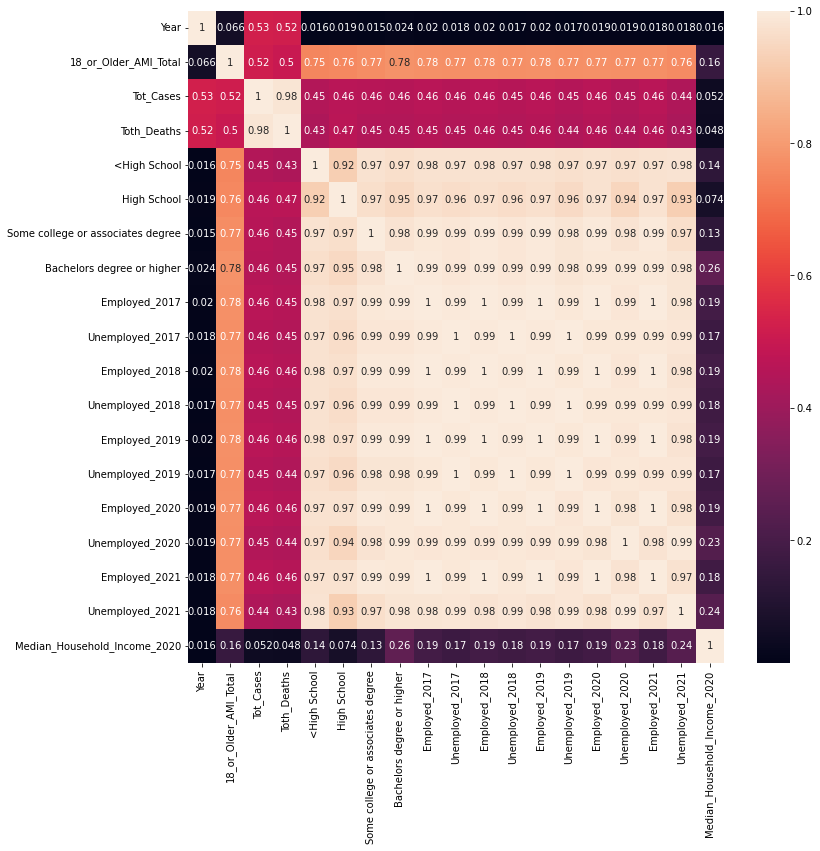

In [9]:
# Generate heatmap to visualize correlation between columns to select feature columns
plt.figure(figsize = (12,12))
sns.heatmap((corr), annot = True)

In [10]:
# Check correlation for the two columns only: AMI cases and Covid Total Cases
covid_ami = ml_alg[['18_or_Older_AMI_Total', 'Tot_Cases']].copy()
corr2 = covid_ami.corr()

<AxesSubplot:>

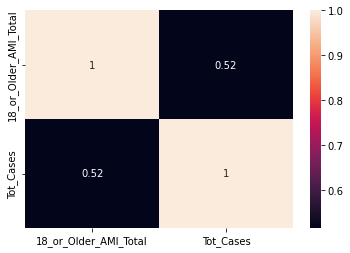

In [10]:
# Generate heatmap for the two columns only: AMI cases and Covid Total Cases
sns.heatmap((corr2), annot = True)

In [12]:
# select features 
X = ml_alg.drop(['18_or_Older_AMI_Total', 'State', 'FIPS'], axis = 1)
y = ml_alg[["18_or_Older_AMI_Total"]]

In [13]:
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(X)
print(scaled)

[[0.         0.         0.         ... 0.1096088  0.04817387 0.15986997]
 [0.25       0.         0.         ... 0.1096088  0.04817387 0.15986997]
 [0.5        0.         0.         ... 0.1096088  0.04817387 0.15986997]
 ...
 [1.         0.35136391 0.31129774 ... 0.49285369 0.47001077 0.63040683]
 [0.75       0.06476771 0.06699012 ... 0.22146109 0.11356266 0.77111181]
 [1.         0.20688854 0.2056904  ... 0.22146109 0.11356266 0.77111181]]


In [14]:
# Check our feature input shape

X.shape

(239, 18)

In [15]:
# Check our feature target/output shape
y.shape

(239, 1)

In [16]:
# Use train_test_split from Sklearn for dividing into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# create a Linear Regression model object
lr = LinearRegression()

In [18]:
# pass through the X_train & y_train data set
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
#Chech the LR test score
lr.score(X_test, y_test)


0.8806234882964457

In [21]:
# Get multiple predictions
y_predict = lr.predict(X_test)

# Show the first 5 predictions
y_predict[:5]

array([[5732111.11416546],
       [ 303375.0705287 ],
       [1169688.5260317 ],
       [1120013.02502395],
       [1678195.52417332]])

In [22]:
# r2_score_df2 = r2_score(y_test, y_predict)
# r2_score_df2



In [23]:
mean_squared_error(y_test,y_predict)

120542342509.60034

## Multiple Linear Regression

In [24]:
# Use train_test_split from Sklearn for dividing into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Create a Linear Regression model object
model = LinearRegression()

In [26]:
# Fit the model to the training data, and calculate the scores for the training and testing data.
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.5836699285711908
Testing Score: 0.8806234882964457


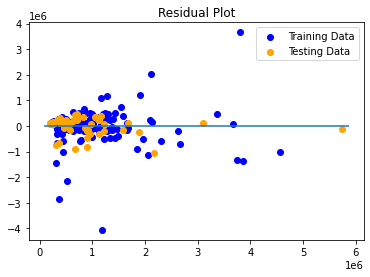

In [27]:
# Plot the residuals for the training and testing data.
# We want our predictions to be close to zero on the y-axis in this plot.
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()

# Other regression models to find the best performing model using GridSearchCV

In [28]:
# Importing other regression models to find the best performing model using GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [29]:
# Define a function to run regression models
def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model':LinearRegression(),
            'params': {'normalize':[True, False]}
    
        },'decision_tree_regressor':{
            'model': DecisionTreeRegressor(),
            'params': {'criterion': ['mse','friedman_mse'], 'splitter':['best', 'random']}
        },'lasso': {
            'model':Lasso(),
            'params': {'alpha':[1,2], 'selection':['random','cyclic']}
        }, 'GBR': {
            'model': GradientBoostingRegressor(),
            'params': {'n_estimators': [100],  'max_depth': [5], 'learning_rate':[0.01]}
        }
    }
    cv = ShuffleSplit(n_splits=10, test_size=0.5, random_state=42)
    
    scores = []
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], return_train_score=False, n_jobs=-1, cv=cv)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_ ,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores, columns=['model','best_score','best_params'])

In [30]:
# Find the best performing model using GridSearchCV
find_best_model_using_gridsearchcv(X, y)

/Users/uzmasyed/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/Users/uzmasyed/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:


,model,best_score,best_params
0,linear_regression,0.445299,{'normalize': False}
1,decision_tree_regressor,0.160960,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
2,lasso,0.497632,"{'alpha': 2, 'selection': 'cyclic'}"
3,GBR,0.357535,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est..."


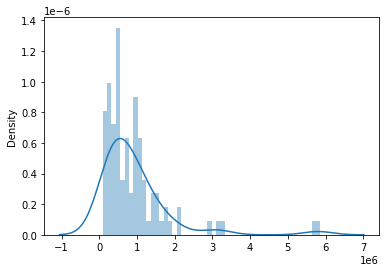

In [31]:
# Visualize our predictions 
import seaborn as sns
predictions = lr.predict(X_test)
sns.distplot((y_test, predictions),bins=50);